<a href="https://colab.research.google.com/github/hanucherukuri/Loan_Prediction/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Acquisition

In [80]:
import numpy as np
import pandas as pd

In [81]:
train_path="/content/drive/MyDrive/Practice Problems/Loan Prediction/train_ctrUa4K.csv"
test_path="/content/drive/MyDrive/Practice Problems/Loan Prediction/test_lAUu6dG.csv"

In [82]:
train=pd.read_csv(train_path)
test=pd.read_csv(test_path)
train.shape, test.shape

((614, 13), (367, 12))

In [83]:
train["from"]="train"
test["from"]="test"

In [84]:
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,from
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [85]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,from
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,test
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,test
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,test
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,test
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,test


In [86]:
df=pd.concat([train, test])

In [87]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,from
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [88]:
df.drop('Loan_Status',axis=1,inplace=True)

# Data wrangling

In [89]:
df.isna().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
from                  0
dtype: int64

In [90]:
df.apply(lambda x: len(x.unique()))

Loan_ID              981
Gender                 3
Married                3
Dependents             5
Education              2
Self_Employed          3
ApplicantIncome      752
CoapplicantIncome    437
LoanAmount           233
Loan_Amount_Term      13
Credit_History         3
Property_Area          3
from                   2
dtype: int64

In [91]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [92]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [93]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
from                 0
dtype: int64

# Exploratory Data Analysis

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

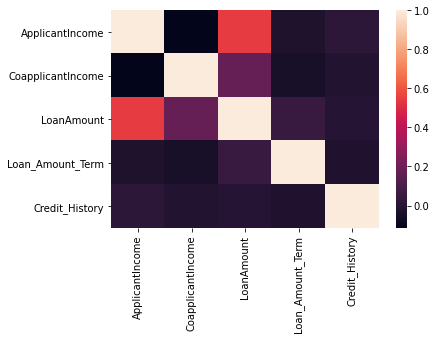

In [95]:
sns.heatmap(df.corr())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.114247,0.546241,-0.023823,0.020201
CoapplicantIncome,-0.114247,1.000000,0.179327,-0.042750,-0.011531
LoanAmount,0.546241,0.179327,1.000000,0.052775,-0.003005
Loan_Amount_Term,-0.023823,-0.042750,0.052775,1.000000,-0.021495
Credit_History,0.020201,-0.011531,-0.003005,-0.021495,1.000000


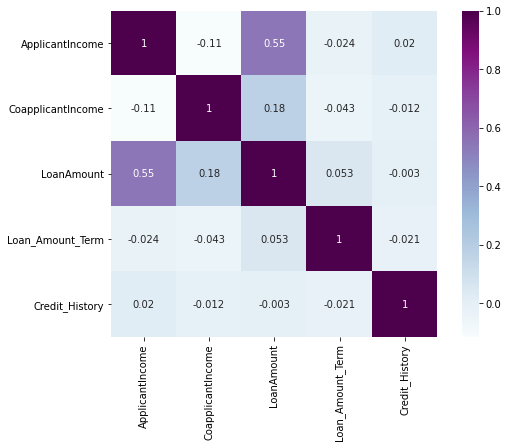

In [96]:
# calculate and visualize correlation matrix
matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


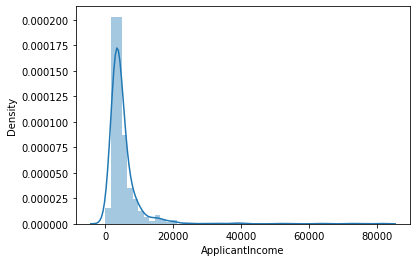

In [97]:
sns.distplot(df.ApplicantIncome)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


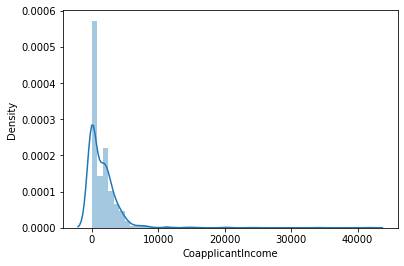

In [98]:
sns.distplot(df.CoapplicantIncome)

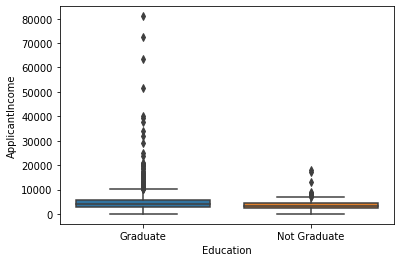

In [99]:
sns.boxplot(x="Education", y="ApplicantIncome", data=df)

In [100]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'from'],
      dtype='object')

In [101]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,from
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,train


# Preprocessing

In [102]:
from sklearn.preprocessing import LabelEncoder
category=['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area']
le=LabelEncoder()
for i in category:
  df[i]=le.fit_transform(df[i])


In [103]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,from
0,LP001002,1,0,0,0,0,5849,0.0,126.0,360.0,1.0,2,train
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,train
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,train
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,train
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,train


In [104]:
train_data=df.loc[df["from"]=="train"]
test_data=df.loc[df["from"]=="test"]

In [105]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,from
0,LP001002,1,0,0,0,0,5849,0.0,126.0,360.0,1.0,2,train
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,train
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,train
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,train
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,train


In [106]:
train_data.drop(["Loan_ID", "from"], axis="columns", inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [107]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,from
0,LP001015,1,1,0,0,0,5720,0.0,110.0,360.0,1.0,2,test
1,LP001022,1,1,1,0,0,3076,1500.0,126.0,360.0,1.0,2,test
2,LP001031,1,1,2,0,0,5000,1800.0,208.0,360.0,1.0,2,test
3,LP001035,1,1,2,0,0,2340,2546.0,100.0,360.0,1.0,2,test
4,LP001051,1,0,0,1,0,3276,0.0,78.0,360.0,1.0,2,test


In [108]:
test_data.drop(["Loan_ID", "from"], axis="columns", inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [109]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0.0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500.0,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800.0,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546.0,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0.0,78.0,360.0,1.0,2


In [110]:
x_train=train_data
y_train=train.Loan_Status

In [111]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)

In [112]:
x_train.shape ,y_train.shape

((614, 11), (614,))

# Feature Scaling

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
test_data=scaler.fit_transform(test_data)

# Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
clf1=LR.fit(x_train, y_train)
clf1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, clf1.predict(x_train))

0.8127035830618893

In [116]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf1, x_train, y_train, cv=10).mean())

0.8079587519830775


In [117]:
clf1.score(x_train, y_train)

0.8127035830618893

In [118]:
#Submisson of reports
submission = pd.read_csv("/content/drive/MyDrive/Practice Problems/Loan Prediction/sample_submission_49d68Cx.csv")

In [119]:
# make prediction on test set
pred_test = clf1.predict(test_data)
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [120]:
# fill the Loan_ID and Loan_Status
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test['Loan_ID']

In [121]:

# replace with "N" and "Y"
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [122]:
# convert to CSV file, without row index
submission.to_csv('logistic.csv', index=False)

# DecesionTreeClassifier

In [123]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier(random_state=0)
clf2=DT.fit(x_train, y_train)


In [124]:
cross_val_score(clf2, x_train, y_train, cv=10).mean()

0.7053939714436805

In [125]:
clf2.score(x_train, y_train)

1.0

# SVM


In [126]:
from sklearn import svm
clf3 = svm.SVC()
clf3.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [127]:
cross_val_score(clf3, x_train, y_train, cv=10).mean()

0.8030142781597037

In [128]:
clf3.score(x_train, y_train)

0.8241042345276873

In [129]:
df_output=pd.DataFrame()
outp=clf3.predict(test_data).astype(int)
df_output['Loan_ID']=test["Loan_ID"]
df_output['Loan_Status']=outp
# replace with "N" and "Y"
df_output['Loan_Status'].replace(0, 'N', inplace=True)
df_output['Loan_Status'].replace(1, 'Y', inplace=True)
# convert to CSV file, without row index
df_output.to_csv('svm.csv', index=False)

# RandomForest Classfier

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
clf4 = RandomForestClassifier(max_depth=2, random_state=0)
clf4.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [132]:
cross_val_score(clf4, x_train, y_train, cv=10).mean()

0.8095716552088842

In [133]:
clf4.score(x_train, y_train)

0.8094462540716613

# Gradient Boosting Classifier

In [134]:
from sklearn.ensemble import GradientBoostingClassifier

In [135]:
clf5 = GradientBoostingClassifier()

In [136]:
clf5.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [137]:
cross_val_score(clf5, x_train, y_train, cv=10).mean()

0.7884981491274459

In [138]:
clf5.score(x_train, y_train)

0.8794788273615635

# ExtraTree Classifier

In [139]:
from sklearn.ensemble import ExtraTreesClassifier

In [140]:
 clf6 = ExtraTreesClassifier(bootstrap=False, criterion='entropy', max_features=0.35000000000000003, min_samples_leaf=18, min_samples_split=9, n_estimators=100)

In [141]:
clf6.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=None,
                     max_features=0.35000000000000003, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=18,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=None, oob_score=False,
                     random_state=None, verbose=0, warm_start=False)

In [142]:
cross_val_score(clf6, x_train, y_train, cv=10).mean()

0.8095716552088842

In [143]:
clf6.score(x_train, y_train)

0.8094462540716613

# GaussianNB

In [144]:
from sklearn.naive_bayes import GaussianNB

In [145]:
clf7 = GaussianNB()
clf7.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [146]:
cross_val_score(clf7, x_train, y_train, cv=10).mean()

0.7932839767318879

In [147]:
clf7.score(x_train, y_train)

0.7996742671009772

# XGB

In [148]:
from xgboost import XGBClassifier

In [149]:
clf8 = XGBClassifier()
clf8.fit(x_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [159]:
cross_val_score(clf8, x_train, y_train, cv=10).mean()

0.7916710735060815

In [151]:
clf8.score(x_train, y_train)

0.8485342019543974

# KNearestNeighbors

In [152]:
from sklearn.neighbors import KNeighborsClassifier
k=2
neigh = KNeighborsClassifier(n_neighbors = k)
clf6=neigh.fit(x_train, y_train)

In [153]:
print(cross_val_score(clf6, x_train, y_train, cv=10).mean())

0.6351136964569012


In [154]:
clf6.score(x_train, y_train)

0.8664495114006515

In [155]:
#Finding Optimal K-value
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

Minimum error:- 0.2019704433497537 at K = 2


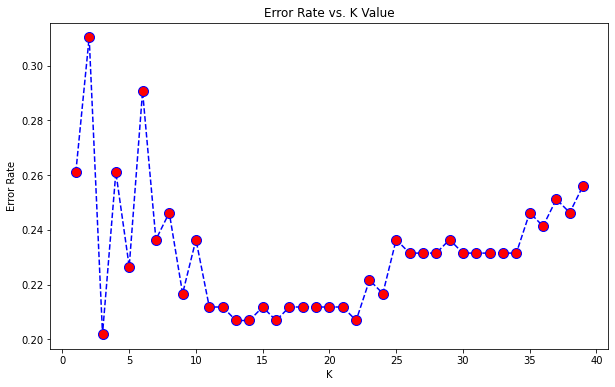

In [156]:
#Error rate vs K value
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.7980295566502463 at K = 2


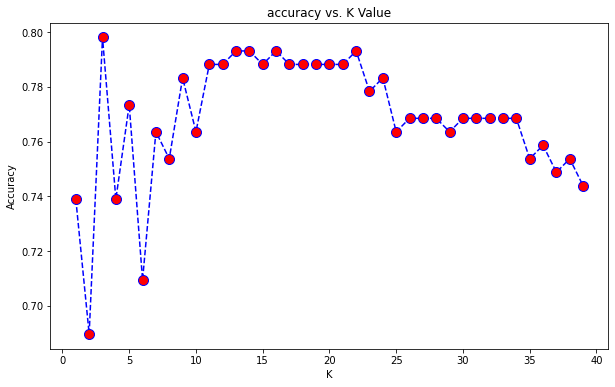

In [157]:
#Accuracy vs K value
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))